In [ ]:
!pip install scikit-fuzzy

In [1]:
import numpy as np
import skfuzzy as fuzzy
import skfuzzy.control as control

#### Criando antescedente (entrada/input)

C:\Users\mpere\AppData\Local\Programs\Python\Python37\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


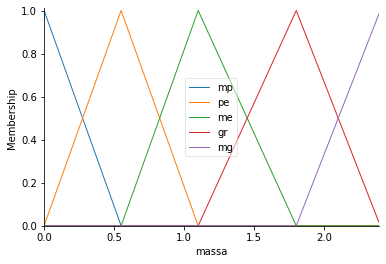

In [14]:
# Definindo universo de discurso e nome da variável
universo_massa = np.arange(0, 2.4, 0.01)

massa = control.Antecedent(universe = universo_massa, label = "massa")

# Criando função de pertinência triangular -> trimf, trapezoidal -> trapmf
massa["mp"] = fuzzy.trimf(massa.universe, [0, 0, 0.55])
massa["pe"] = fuzzy.trimf(massa.universe, [0, 0.55, 1.1])
massa["me"] = fuzzy.trimf(massa.universe, [0.55, 1.1, 1.8])
massa["gr"] = fuzzy.trimf(massa.universe, [1.1, 1.8, 2.4])
massa["mg"] = fuzzy.trimf(massa.universe, [1.8, 2.4, 2.4])

massa.view()

C:\Users\mpere\AppData\Local\Programs\Python\Python37\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


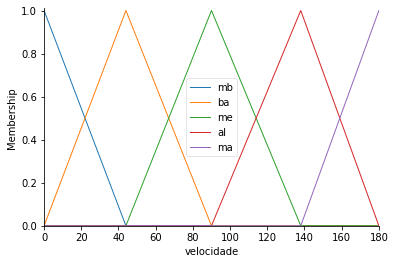

In [15]:
# Definindo universo de discurso e nome da variável
universo_velocidade = np.arange(0, 181)

velocidade = control.Antecedent(universe = universo_velocidade, label = "velocidade")

# Criando função de pertinência triangular -> trimf, trapezoidal -> trapmf
velocidade["mb"] = fuzzy.trimf(velocidade.universe, [0, 0, 44])
velocidade["ba"] = fuzzy.trimf(velocidade.universe, [0, 44, 90])
velocidade["me"] = fuzzy.trimf(velocidade.universe, [44, 90, 138])
velocidade["al"] = fuzzy.trimf(velocidade.universe, [90, 138, 180])
velocidade["ma"] = fuzzy.trimf(velocidade.universe, [138, 180, 180])

velocidade.view()

#### Criando consequent (saída/output)

C:\Users\mpere\AppData\Local\Programs\Python\Python37\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


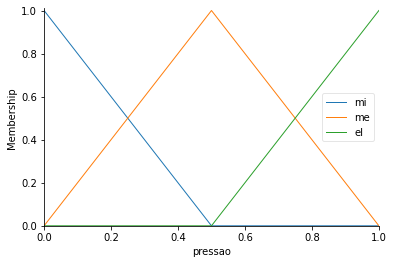

In [20]:
# Universo da gorjeta
universo_pressao = np.arange(0, 1.001, 0.001)

pressao = control.Consequent(universe = universo_pressao, label = "pressao")

pressao["mi"] = fuzzy.trimf(pressao.universe, [0, 0, 0.5])
pressao["me"] = fuzzy.trimf(pressao.universe, [0, 0.5, 1])
pressao["el"] = fuzzy.trimf(pressao.universe, [0.5, 1, 1])

pressao.view()

#### Criando regras

In [21]:
# REGRA -> expressão X, resultado Y

regra1 = control.Rule((velocidade["mb"] & massa["mp"]) |
                      (velocidade["mb"] & massa["pe"]) |
                      (velocidade["mb"] & massa["me"]) |
                      (velocidade["ba"] & massa["mp"]) |
                      (velocidade["ba"] & massa["pe"]) |
                      (velocidade["ba"] & massa["me"]) |
                      (velocidade["me"] & massa["mp"]) |
                      (velocidade["me"] & massa["pe"]), pressao["mi"])


regra2 = control.Rule((velocidade["mb"] & massa["gr"]) |
                      (velocidade["mb"] & massa["mg"]) |
                      (velocidade["ba"] & massa["gr"]) |
                      (velocidade["ba"] & massa["mg"]) |
                      (velocidade["me"] & massa["me"]) |
                      (velocidade["al"] & massa["mp"]) |
                      (velocidade["al"] & massa["pe"]) |
                      (velocidade["al"] & massa["me"]) |
                      (velocidade["ma"] & massa["mp"]) |
                      (velocidade["ma"] & massa["pe"]) |
                      (velocidade["ma"] & massa["me"]), pressao["me"])


regra3 = control.Rule((velocidade["me"] & massa["gr"]) |
                      (velocidade["me"] & massa["mg"]) |
                      (velocidade["al"] & massa["gr"]) |
                      (velocidade["al"] & massa["mg"]) |
                      (velocidade["ma"] & massa["gr"]) |
                      (velocidade["ma"] & massa["mg"]), pressao["el"])

#### Criando sistema

In [22]:
# Adicionando regras ao controle
pressao_controle = control.ControlSystem([regra1, regra2, regra3])

# Criando sistema com o controle de gorjeta
sistema = control.ControlSystemSimulation(pressao_controle)

Resultado 'desfuzzificado': 0.5789779987099277


C:\Users\mpere\AppData\Local\Programs\Python\Python37\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


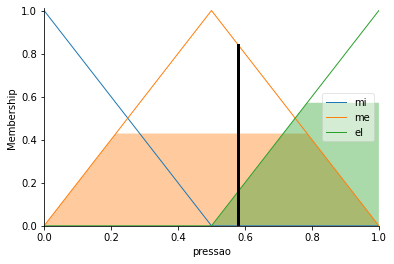

In [24]:
sistema.input["velocidade"] = 155
sistema.input["massa"] = 1.5

# Executando o sistema
sistema.compute()

print(f"Resultado 'desfuzzificado': {sistema.output['pressao']}")

pressao.view(sim = sistema)